In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\train_data\\train.csv"
df_train = pd.read_csv(train_data_path)

In [3]:
test_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\test_data\\test.csv"
df_test = pd.read_csv(test_data_path)

# EDA

In [4]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95


In [6]:
df_train.shape

(210240, 16)

In [7]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df_train.dtypes

Timestamp             datetime64[ns]
Temperature                  float64
Dew Point                    float64
Surface Albedo               float64
Pressure                       int64
Wind Direction                 int64
Wind Speed                   float64
Clearsky DHI                   int64
Clearsky DNI                   int64
Clearsky GHI                   int64
Fill Flag                      int64
Ozone                        float64
Cloud Type                     int64
Solar Zenith Angle           float64
Precipitable Water           float64
Relative Humidity            float64
dtype: object

Cloud Type


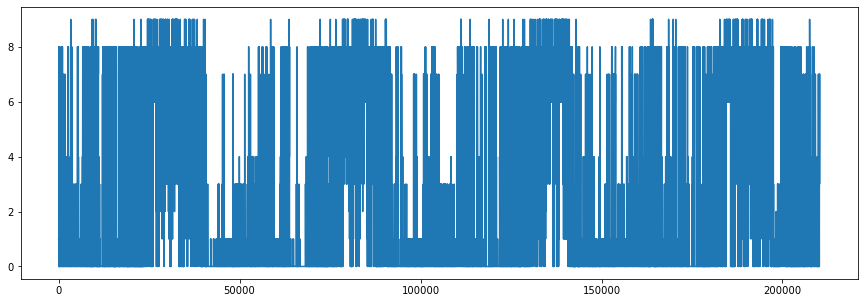

Dew Point


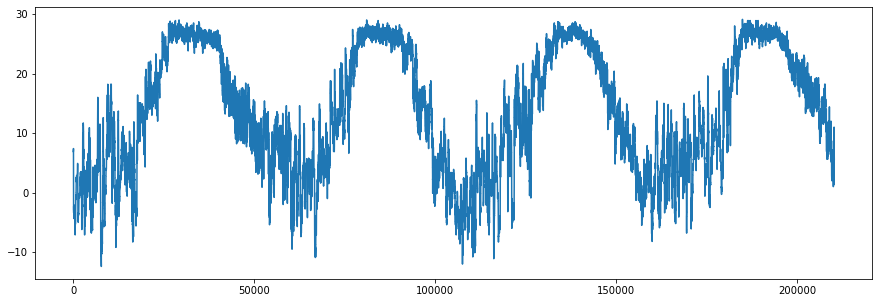

Temperature


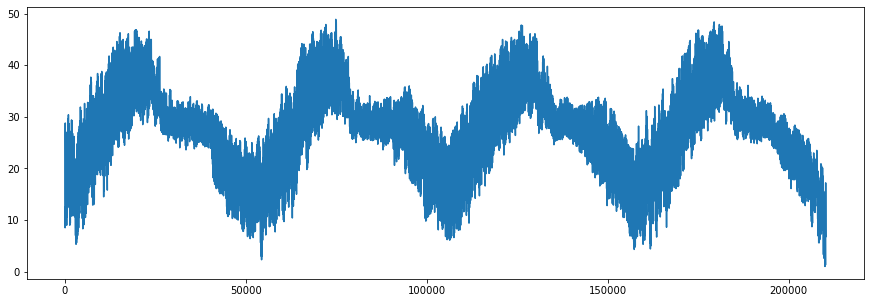

Pressure


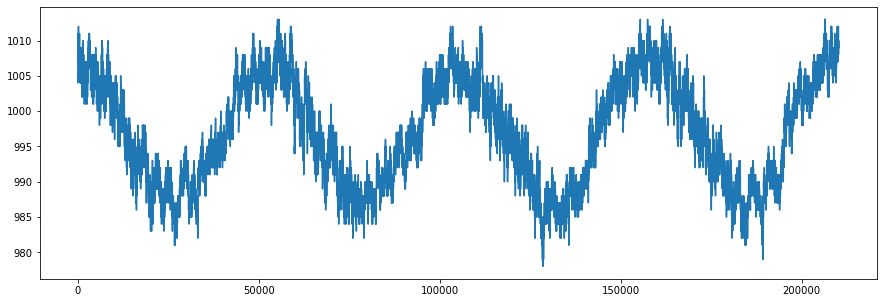

Relative Humidity


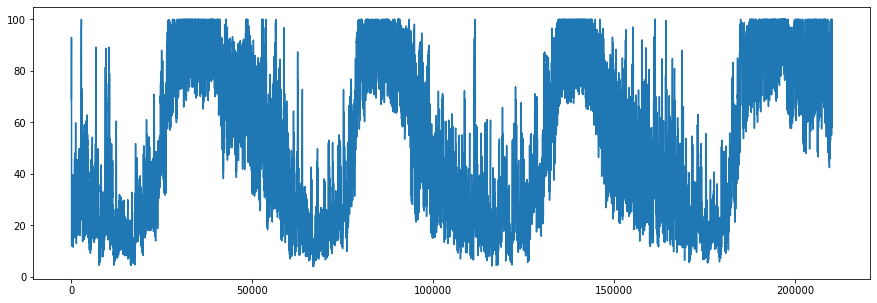

Ozone


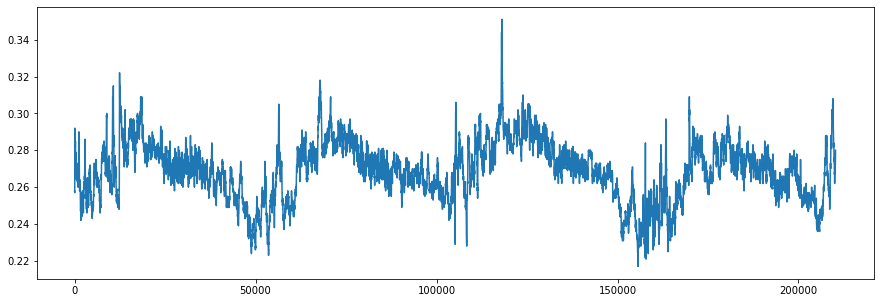

Solar Zenith Angle


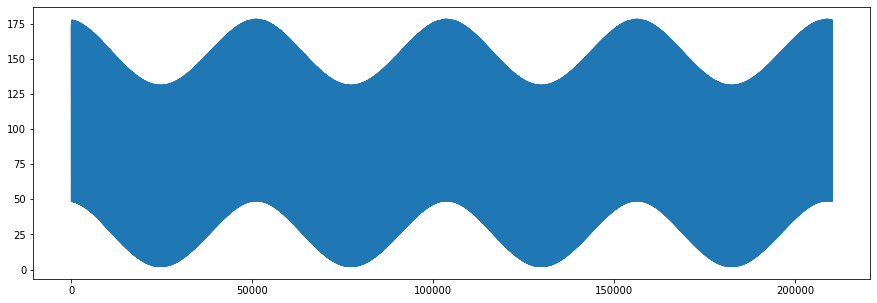

Surface Albedo


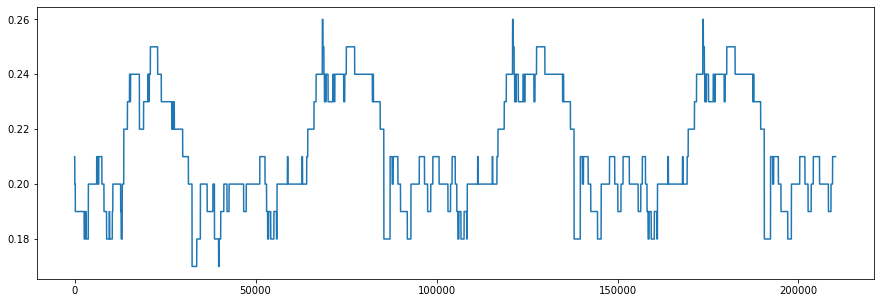

Precipitable Water


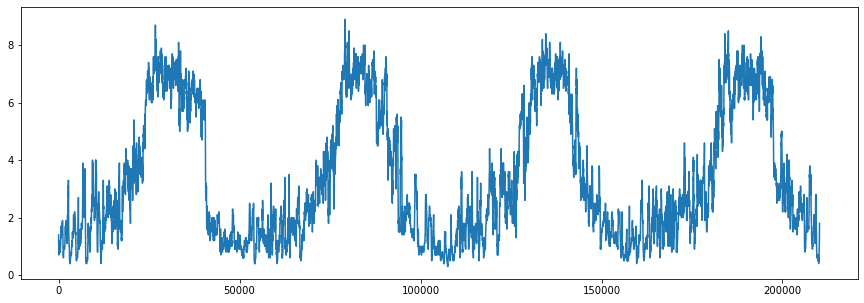

Wind Direction


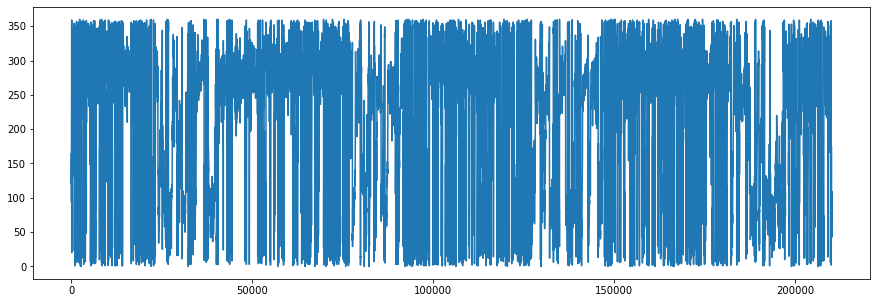

Wind Speed


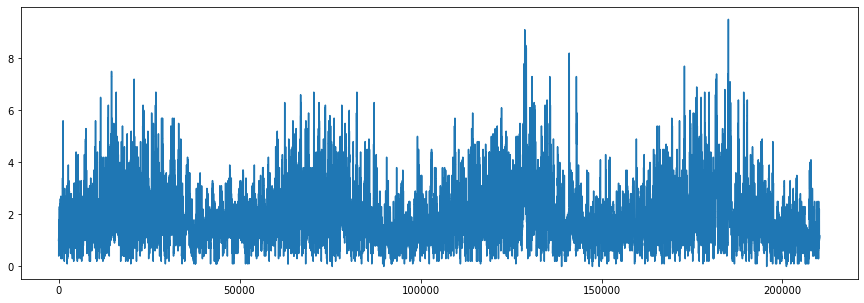

Fill Flag


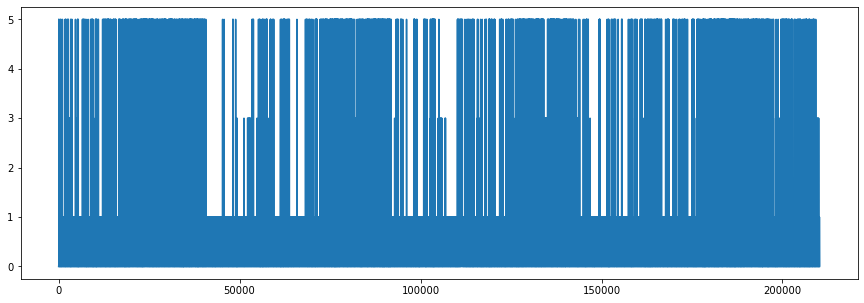

In [57]:
feature_cols = ['Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Ozone','Solar Zenith Angle','Surface Albedo','Precipitable Water','Wind Direction','Wind Speed','Fill Flag']

for col in feature_cols:
    print(col)
    plt.figure(figsize=(15, 5))
    df_train[col].plot()
    plt.show()

# Heatmap Analysis

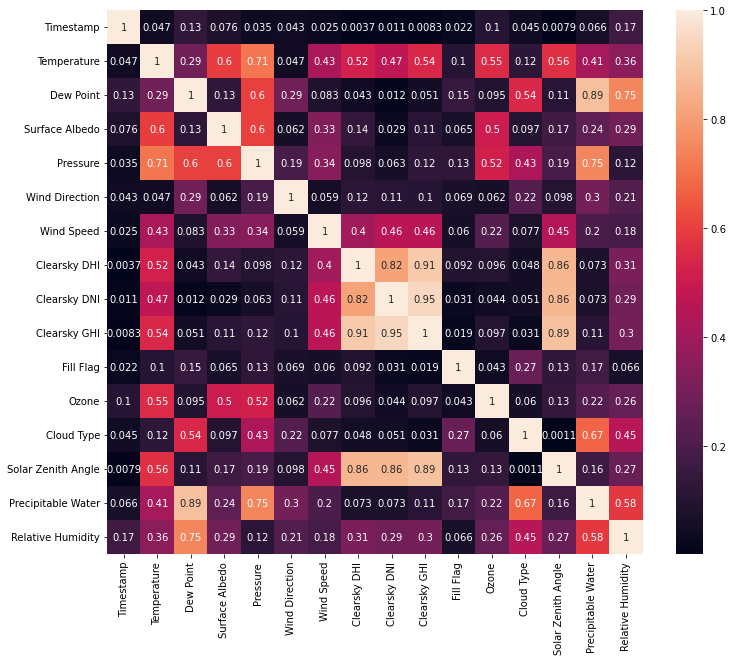

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr().abs(), annot=True)
plt.show()

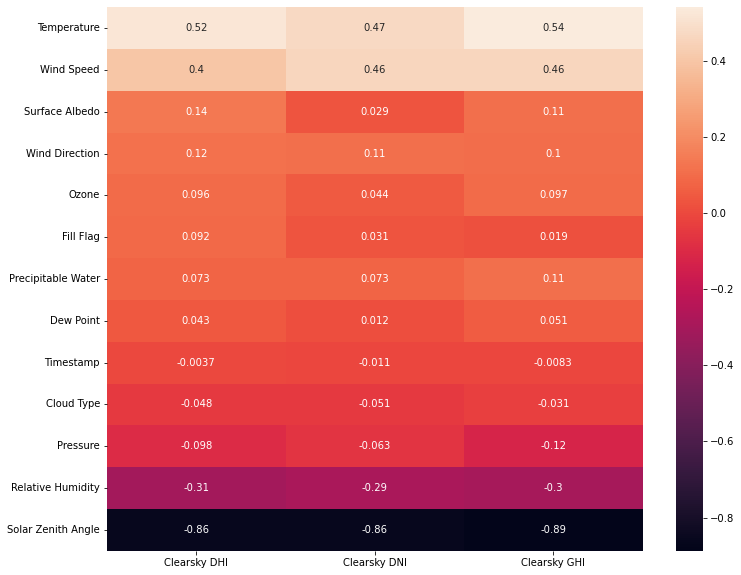

In [59]:
target_cols = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr()[target_cols].drop(target_cols).sort_values(target_cols, ascending=False), annot=True)
plt.show()

# Calculating GHI

In [9]:
df_train['GHI_cal'] = df_train['Clearsky DNI']*np.cos(np.radians(df_train['Solar Zenith Angle'])) + df_train['Clearsky DHI']

In [10]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,GHI_cal
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82,0.0
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73,0.0
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65,0.0
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11,0.0
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63,0.0
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26,0.0
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26,0.0
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95,0.0


# Heatmap with GHI 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

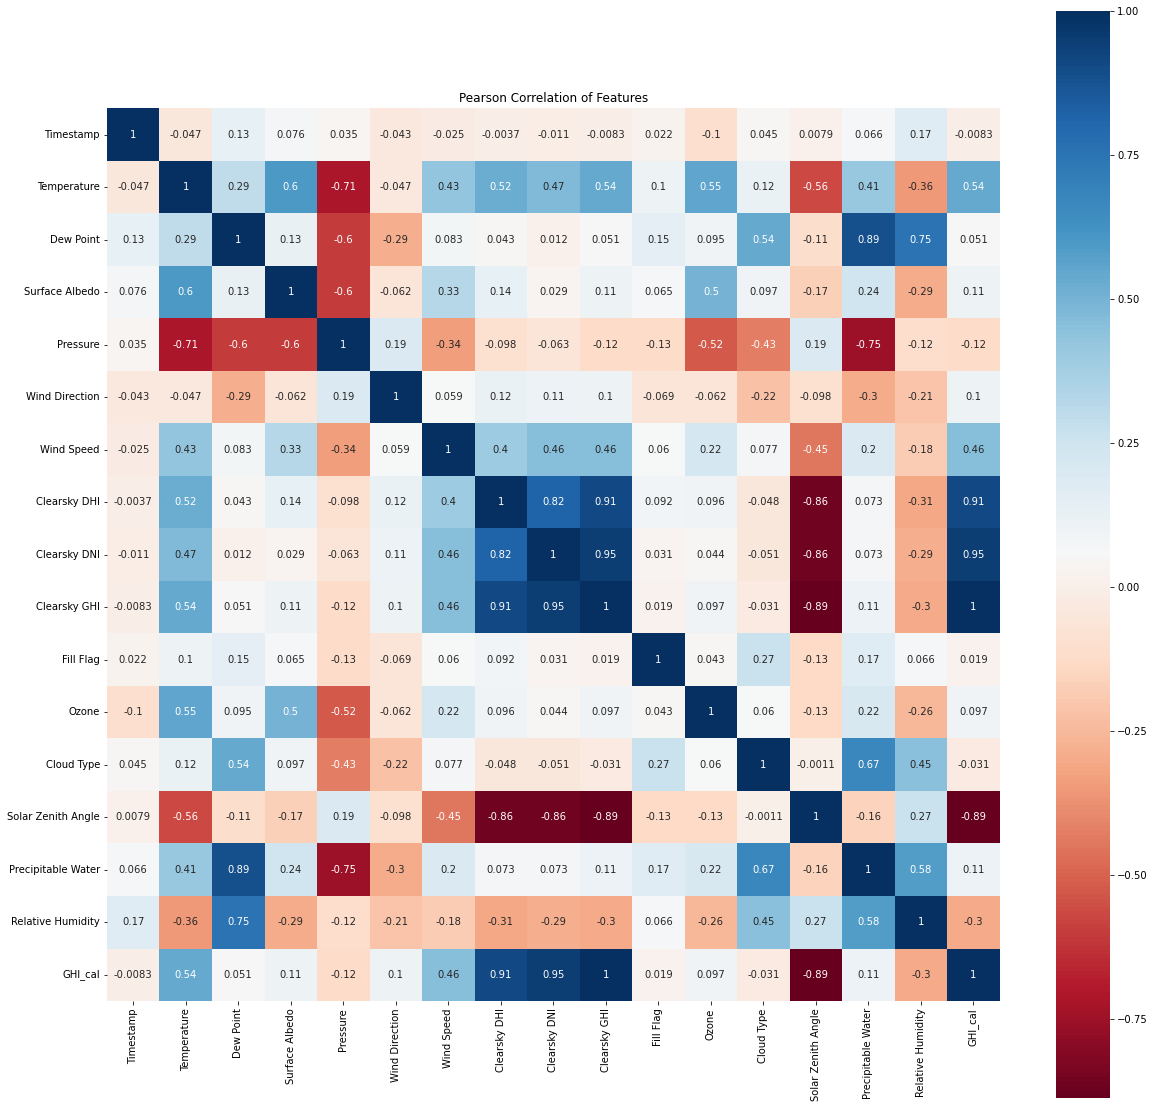

In [62]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features')
sns.heatmap(df_train.corr(), square=True, cmap=colormap, annot=True)

GHI, DNI, DHI have high correlation with Solar Zenith Angle.<br>
Moderate Correlation Temperature & Wind Speed.<br>
Temperature has high correlation with pressure & surface albedo and moderate correlaton with Precipitable Water.<br>
Precipitable Water has High correlation with Dew Point & Pressure and moderately correlated with relative humidity, cloud type.

# GHI and TIME plot

In [63]:
from matplotlib import dates as mpl_dates

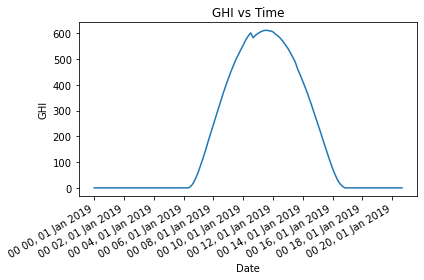

In [67]:
plt.plot(df_train['Timestamp'][0:125], df_train['Clearsky GHI'][0:125])
plt.title('GHI vs Time')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%M %H, %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

In [11]:
df_train.describe()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,GHI_cal
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000
mean,26.795495,13.447805,0.211623,996.856141,209.095453,1.918037,96.720681,225.098992,249.938537,0.288699,0.268813,2.513604,89.745758,3.377582,53.364443,249.938980
std,8.639162,10.234861,0.020889,7.226820,101.616108,1.194954,120.334380,277.920322,325.049751,1.052178,0.015632,3.093565,42.852632,2.261960,29.692608,325.049633
min,1.000000,-12.400000,0.170000,978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217000,0.000000,2.210000,0.300000,4.100000,0.000000
25%,20.800000,4.900000,0.200000,990.000000,109.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.259000,0.000000,53.140000,1.500000,25.540000,0.000000
50%,27.300000,13.100000,0.200000,997.000000,248.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.270000,1.000000,89.400000,2.500000,51.210000,0.000000
75%,32.200000,24.400000,0.230000,1003.000000,293.000000,2.500000,194.000000,486.000000,533.000000,0.000000,0.279000,6.000000,126.440000,5.700000,80.820000,533.435489
max,48.900000,29.100000,0.260000,1013.000000,360.000000,9.500000,603.000000,1008.000000,1053.000000,5.000000,0.351000,9.000000,177.950000,8.900000,100.000000,1054.021274


In [13]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.round('1min')

In [14]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp']).astype(np.int64)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  int64  
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [16]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,GHI_cal
0,1546300800000000000,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82,0.0
1,1546301400000000000,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73,0.0
2,1546302000000000000,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65,0.0
3,1546302600000000000,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11,0.0
4,1546303200000000000,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,1672528200000000000,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63,0.0
210236,1672528800000000000,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26,0.0
210237,1672529400000000000,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26,0.0
210238,1672530000000000000,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95,0.0


In [17]:
df_train.drop(columns = ['Fill Flag', 'GHI_cal'], inplace=True)

In [18]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,1546300800000000000,12.5,6.9,0.21,1005,121,1.0,0,0,0,0.258,1,173.92,1.4,68.82
1,1546301400000000000,12.3,6.9,0.21,1005,122,1.0,0,0,0,0.258,1,171.79,1.3,69.73
2,1546302000000000000,12.1,6.9,0.21,1005,124,1.0,0,0,0,0.258,1,169.59,1.3,70.65
3,1546302600000000000,12.0,6.9,0.21,1005,125,1.0,0,0,0,0.258,1,167.37,1.3,71.11
4,1546303200000000000,11.8,6.9,0.21,1005,126,1.0,0,0,0,0.258,1,165.13,1.3,71.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,1672528200000000000,6.9,5.8,0.21,1009,54,1.2,0,0,0,0.279,4,173.77,1.8,92.63
210236,1672528800000000000,6.8,5.8,0.21,1009,54,1.2,0,0,0,0.279,7,175.77,1.8,93.26
210237,1672529400000000000,6.8,5.8,0.21,1009,55,1.1,0,0,0,0.279,7,177.31,1.8,93.26
210238,1672530000000000000,6.8,5.6,0.21,1009,55,1.1,0,0,0,0.279,7,177.36,1.8,91.95


# Heatmap analysis

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

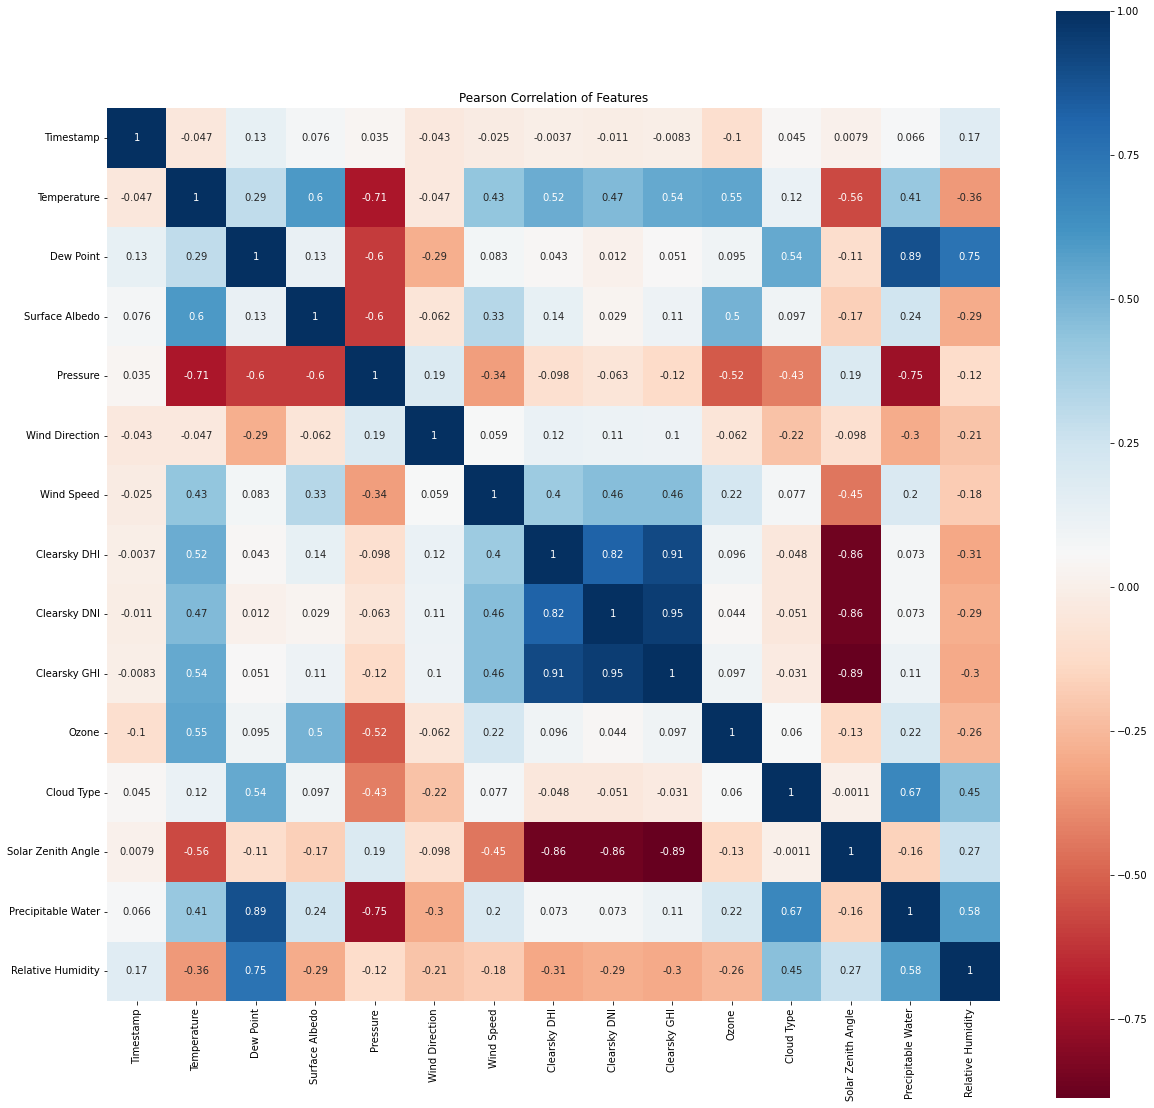

In [19]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features')
sns.heatmap(df_train.corr(), square=True, cmap=colormap, annot=True)

In [20]:
df_train.shape

(210240, 15)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  int64  
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Ozone               210240 non-null  float64
 11  Cloud Type          210240 non-null  int64  
 12  Solar Zenith Angle  210240 non-null  float64
 13  Precipitable Water  210240 non-null  float64
 14  Relative Humidity   210240 non-null  float64
dtypes: float64(8), int64(7)
memory usa

# Model Selection

In [22]:
from xgboost import XGBRegressor

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
X = df_train.drop(columns=['Clearsky GHI'])
y = df_train['Clearsky GHI']

In [27]:
x1_train = df_train.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y1_train = df_train['Clearsky GHI']

x2_train = df_train.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y2_train = df_train['Clearsky DHI']

x3_train = df_train.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y3_train = df_train['Clearsky DNI']

# Model fitting

In [28]:
model1 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model1.fit(x1_train, y1_train)#GHI

model2 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model2.fit(x2_train, y2_train)#DHI

model3 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model3.fit(x3_train, y3_train)#DNI

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Predction and evaluation

In [29]:
train_pred1 = model1.predict(x1_train)

In [30]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [32]:
print('Clearsky GHI')
print(f"Train score = {model1.score(x1_train, y1_train)}\tTrain MSE = {mean_squared_error(train_pred1, y1_train)}")
# print(f"Validation score = {model1.score(x1_valid, y1_valid)}\tValidation MSE = {mean_squared_error(valid1_pred, y1_valid)}")

Clearsky GHI
Train score = 0.9999968911197058	Train MSE = 0.32847446261904734


In [33]:
rmse1 = np.sqrt(MSE(train_pred1,y1_train))

In [34]:
rmse1

0.5731269166764438

In [35]:
train2_pred = model2.predict(x2_train)

In [36]:
print('Clearsky DHI')
print(f"Train score = {model2.score(x2_train, y2_train)}\tTrain MSE = {mean_squared_error(train2_pred, y2_train)}")
# print(f"Validation score = {model2.score(x2_valid, y2_valid)}\tValidation MSE = {mean_squared_error(valid2_pred, y2_valid)}")

Clearsky DHI
Train score = 0.9999434936641971	Train MSE = 0.8182283613940649


In [38]:
train3_pred = model3.predict(x3_train)


In [39]:
print('Clearsky DNI')
print(f"Train score = {model3.score(x3_train, y3_train)}\tTrain MSE = {mean_squared_error(train3_pred, y3_train)}")
# print(f"Validation score = {model3.score(x3_valid, y3_valid)}\tValidation MSE = {mean_squared_error(valid3_pred, y3_valid)}")

Clearsky DNI
Train score = 0.9999307874895863	Train MSE = 5.345928493131496


# Test Set 

In [40]:
test_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\test_data\\test.csv"
df_test = pd.read_csv(test_data_path)

In [172]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [41]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp']).astype(np.int64)

In [42]:
df_test.drop(columns = ['Fill Flag'], inplace=True)

In [43]:
X_test = df_test.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])

In [44]:
X_test

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,1672531200000000000,11.3,1.6,0.21,1006,305,1.2,0.255,0,173.92,1.4,51.38
1,1672531800000000000,11.2,1.6,0.21,1006,306,1.2,0.255,0,171.79,1.4,51.72
2,1672532400000000000,11.1,1.6,0.21,1006,306,1.2,0.255,0,169.59,1.4,52.06
3,1672533000000000000,11.0,1.6,0.21,1006,307,1.2,0.255,0,167.37,1.4,52.41
4,1672533600000000000,10.9,1.2,0.21,1006,307,1.2,0.255,0,165.13,1.4,51.34
...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1704064200000000000,11.7,2.0,0.21,1006,303,1.2,0.254,0,173.67,1.4,51.26
52556,1704064800000000000,11.6,2.0,0.21,1006,303,1.2,0.254,0,175.68,1.4,51.60
52557,1704065400000000000,11.5,2.0,0.21,1006,304,1.2,0.254,0,177.23,1.4,51.94
52558,1704066000000000000,11.4,1.6,0.21,1006,304,1.2,0.254,0,177.34,1.4,51.04


In [45]:
pred3 = model3.predict(X_test)#DNI

In [46]:
pred3

array([-13.170156, -11.679279, -11.614364, ..., -10.068861, -13.137626,
       -13.133793], dtype=float32)

In [47]:
pred2 = model2.predict(X_test)#DHI

In [48]:
pred2

array([-3.4649515, -4.2807994, -3.2687142, ..., -4.3113856, -3.6053674,
       -3.5155823], dtype=float32)

In [49]:
pred1 = pred3*np.cos(np.radians(df_test['Solar Zenith Angle'])) + pred2  #GHI

In [50]:
pred1

0        9.631122
1        7.278783
2        8.154476
3        6.573270
4        7.533968
           ...   
52555    6.367736
52556    5.996255
52557    5.745711
52558    9.518103
52559    9.584598
Name: Solar Zenith Angle, Length: 52560, dtype: float64

In [51]:
subm = pd.DataFrame()
subm['Clearsky GHI'] = pred1
subm['Clearsky DHI'] = pred2
subm['Clearsky DNI'] = pred3

In [55]:
subm.loc[ subm['Clearsky DHI'] < 0, 'Clearksy DHI'] = 0
subm.loc[ subm['Clearsky DNI'] < 0, 'Clearsky DNI'] = 0
subm.loc[ subm['Clearsky GHI'] < 0, 'Clearsky GHI'] = 0
subm['Clearsky DHI'] = subm['Clearsky DHI'].astype("int")
subm['Clearsky DNI'] = subm['Clearsky DNI'].astype("int")
subm['Clearsky GHI'] = subm['Clearsky GHI'].astype("int")

In [56]:
subm.head()

,Clearsky GHI,Clearsky DHI,Clearsky DNI,Clearksy DHI
0,9,-3,0,0.0
1,7,-4,0,0.0
2,8,-3,0,0.0
3,6,-4,0,0.0
4,7,-2,0,0.0


In [57]:
subm.tail()

,Clearsky GHI,Clearsky DHI,Clearsky DNI,Clearksy DHI
52555,6,-3,0,0.0
52556,5,-4,0,0.0
52557,5,-4,0,0.0
52558,9,-3,0,0.0
52559,9,-3,0,0.0


In [59]:
subm.to_csv('solar_submission1.csv', index=False)